In [1]:
import camb
import numpy as np
import scipy.integrate as si
from camb import get_matter_power_interpolator
from colossus.cosmology import cosmology as col_cosmology
from colossus.lss import bias, mass_function

import limpy.cosmos as cosmos
import limpy.lines as ll

In [69]:
line_name = "CII158"
model_name="Silva15-m1"
sfr_model="Behroozi19"

line_models=ll.line_modeling(line_name = line_name, model_name= model_name,
                 sfr_model=sfr_model, parameters={'use_scatter':True, "a_std": 2, "b_std": 1})

In [70]:
mh=np.logspace(10,13, num=500)
z= 7

lc1=line_models.line_luminosity(mh, z)
lc2=line_models.line_luminosity(mh, z)
lc3=line_models.line_luminosity(mh, z)

In [71]:
line_models_ns=ll.line_modeling(line_name = line_name, model_name= model_name,
                 sfr_model=sfr_model, parameters={'use_scatter':False})

lc4=line_models_ns.line_luminosity(mh, z)

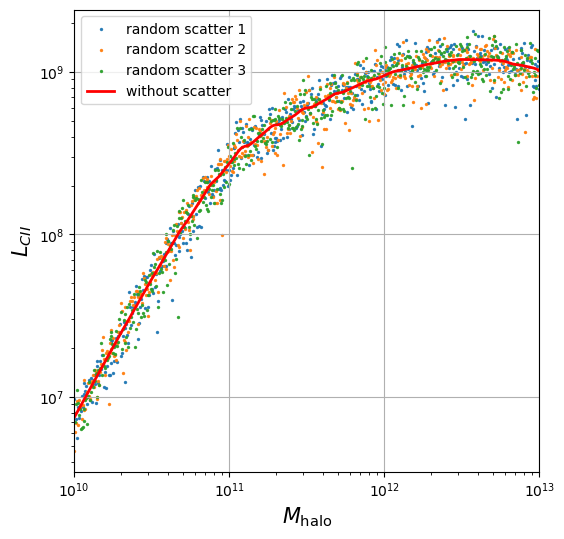

In [72]:
# Plotting
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))

s = 2
plt.scatter(mh, lc1, label='random scatter 1', s=s, alpha=0.9)
plt.scatter(mh, lc2, label='random scatter 2', s=s, alpha=0.9)
plt.scatter(mh, lc3, label='random scatter 3', s=s, alpha=0.9)

plt.plot(mh, lc4, lw=2, color="r", label="without scatter")

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e10, 1e13)

plt.xlabel(r'$M_{\rm halo}$')
plt.ylabel(r'$L_{CII}$')
plt.legend()
plt.grid(True)


plt.savefig("lim_scatter.pdf", bbox_inches="tight")

In [6]:
# Check power spectrum

In [66]:
k= np.logspace(-2,1)
z=2
lim_theory= ll.theory(parameters={'use_scatter':True, "a_std": 12, "b_std": 1})

lim_theory_ns= ll.theory(parameters={'use_scatter':False, "a_std": 12,  "b_std": 1})

In [67]:
pk1= lim_theory.Pk_line(k, z)
pk2= lim_theory.Pk_line(k, z)
pk3= lim_theory.Pk_line(k, z)
pk4= lim_theory_ns.Pk_line(k, z)

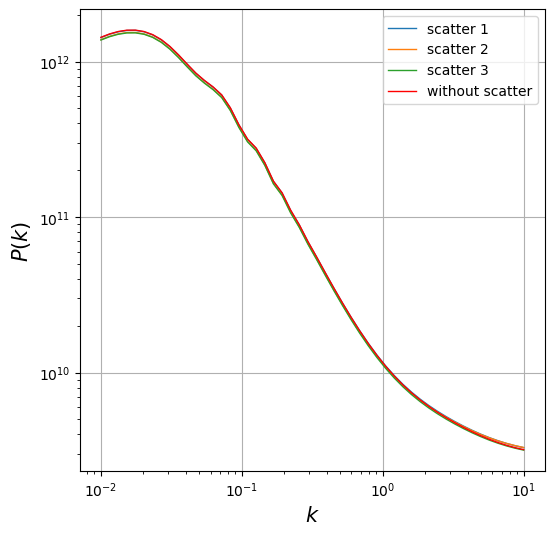

In [68]:
# Plotting

plt.figure(figsize=(6, 6))


plt.plot(k, pk1, lw=1,  label="scatter 1")
plt.plot(k, pk2, lw=1,  label="scatter 2")
plt.plot(k, pk3, lw=1,  label="scatter 3")

plt.plot(k, pk4, lw=1, color="r", label="without scatter")

plt.yscale('log')
plt.xscale('log')



plt.ylabel(r'$P(k)$')
plt.xlabel(r'$k$')
plt.legend()
plt.grid(True)


plt.savefig("lim_scatter.pdf", bbox_inches="tight")

# check cosmology

In [10]:
k= np.logspace(-2,1)
z=2

pk1 = ll.theory(parameters={'omega_m': 0.2}).Pk_line(k, z)
pk2 = ll.theory(parameters={'omega_m': 0.3}).Pk_line(k, z)
pk3 = ll.theory(parameters={'omega_m': 0.4}).Pk_line(k, z)


    


<Figure size 600x600 with 0 Axes>

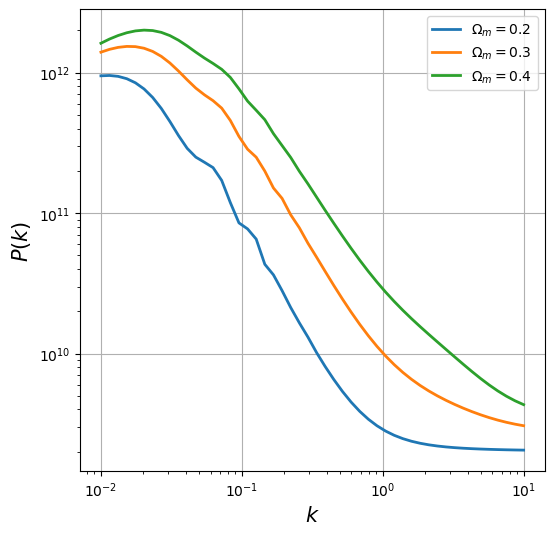

In [11]:
# Plotting

plt.figure(figsize=(6, 6))


plt.plot(k, pk1, lw=2,  label=r"$\Omega_m = 0.2$")
plt.plot(k, pk2, lw=2,  label=r"$\Omega_m = 0.3$")
plt.plot(k, pk3, lw=2,  label=r"$\Omega_m = 0.4$")


plt.yscale('log')
plt.xscale('log')



plt.ylabel(r'$P(k)$')
plt.xlabel(r'$k$')
plt.legend()
plt.grid(True)


plt.savefig("lim_scatter.pdf", bbox_inches="tight")

In [17]:
halo_file ="../limpy/data/" + 'halos_L205_z7.00.npz'

In [18]:
# Let's download a sample halo catalogue
#halo_file = "../data/" + 'halos_L205_z7.00.npz'

# load it and check the quantities
hf = np.load(halo_file)

# Read the quantities
mass = hf ['m']
x = hf ['x']
y = hf ['y']
z = hf ['z']

print("The maximum value of mass--->", mass.max())
print("The mainimum value of mass--->", mass.min())

The maximum value of mass---> 1448705000000.0
The mainimum value of mass---> 10000008000.0


Text(0, 0.5, 'y')

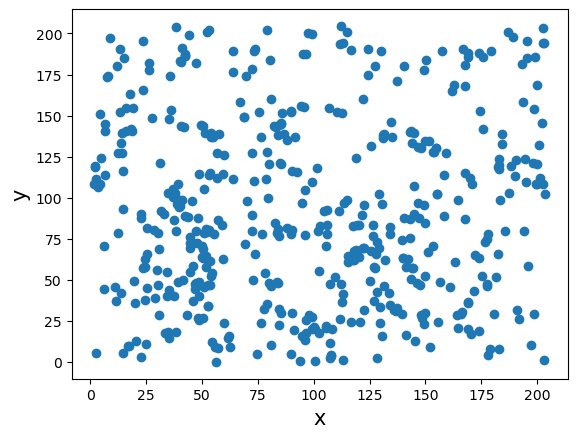

In [28]:
import matplotlib.pyplot as plt

#plot the distribution of 500 halos

plt.scatter(x[:500],y[:500])
plt.xlabel("x")
plt.ylabel("y")

In [32]:
# cross CII_280 * CO54 (90)
z = 7.00  # redshift of catalog
line_name = "CII158" # line name that you want to paint

model_name="Fonseca16"  # line luminosity model name
sfr_model="Silva15" # sfr model name 
mmin=1e11              # minimum mass of the halos
small_h = 0.68         # value of Hubble parameter. H0 = 100 * small_h
halocat_file_type="input_cat" # 
ngrid= 256             # numer of grid points along the all three exes
boxsize = 205          # Length of the box 
nu_obs = 220
delta_nu =2.2
theta_fwhm = 1

# make intensity grid
lim_sim = ll.lim_sims(halo_file, z, model_name=model_name, sfr_model = sfr_model,
                                line_name=line_name, halo_cutoff_mass=mmin, 
                                halocat_type="input_cat",
                                ngrid_x=ngrid, ngrid_y=ngrid, ngrid_z=ngrid,
                                boxsize_x=boxsize, boxsize_y=boxsize, 
                                boxsize_z=boxsize, nu_obs=nu_obs, theta_fwhm=theta_fwhm, dnu_obs=delta_nu)



Igcal=lim_sim.make_intensity_grid()


In [33]:
print("The shape of the grid is ", np.shape(Igcal))

The shape of the grid is  (256, 256, 10)


# calculate the 3D power spectrum and plot it

The function can calculate the power spectrum of both cube and rectangular box. If boxsize and ngrids are different along three axes, then the function "get_pk3d" will assume it as a rectangular box.

In [43]:
import limpy.powerspectra as lp
import limpy.utils as lu

ngrid_z = np.shape(Igcal)[2]


kcal, pkcal = lp.get_pk3d(
                            Igcal,
                            boxsize,
                            boxsize,
                            boxsize,
                            ngrid,
                            ngrid,
                            ngrid_z )

(0.030649684425266274, 3.923159606434083)

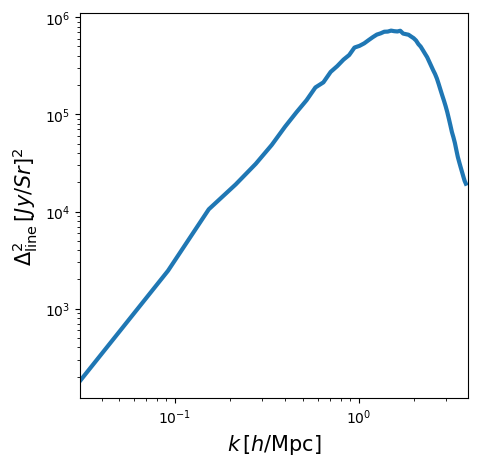

In [44]:
# plot the power spectrum
fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)

KF = 2* np.pi/boxsize
KN = np.pi * ngrid/boxsize

ax.loglog(kcal, lu.dk(kcal, pkcal), lw=3)

plt.ylabel(r"$\Delta^2_{\rm line} \, [Jy/Sr]^2$")
plt.xlabel(r"$k\, [h/\mathrm{Mpc}]$")

plt.xlim(KF, KN)



# Increase the beam size to 4.5 arc minute and show the intensity map

In [58]:
import limpy.plotter as lplot


theta_fwhm = 4.5
# make intensity grid
lim_sim = ll.lim_sims(halo_file, z, model_name=model_name, sfr_model = sfr_model,
                                line_name=line_name, halo_cutoff_mass=mmin, 
                                halocat_type="input_cat",
                                ngrid_x=ngrid, ngrid_y=ngrid, ngrid_z=ngrid,
                                boxsize_x=boxsize, boxsize_y=boxsize, 
                                boxsize_z=boxsize, nu_obs=nu_obs, theta_fwhm=theta_fwhm, dnu_obs=delta_nu)


Igcal=lim_sim.make_intensity_grid()

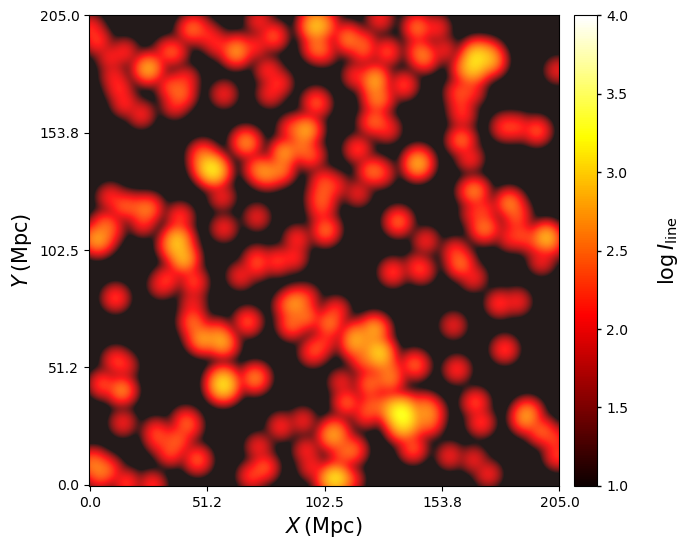

In [59]:
plot = lplot.plot()

plot.plot_beam_convolution(Igcal[:,:,1], ngrid, boxsize, 
                           z, cmap="hot", plot_scale="log", vmax=10000, vmin=10)

# Compare the power spectrum when beam sizes are 1 arcmin and 4.5 arcmin

In [60]:
ngrid_z = np.shape(Igcal)[2]

kcal_beam2, pkcal_beam2 = lp.get_pk3d(
                            Igcal,
                            boxsize,
                            boxsize,
                            boxsize,
                            ngrid,
                            ngrid,
                            ngrid_z )

(0.030649684425266274, 3.923159606434083)

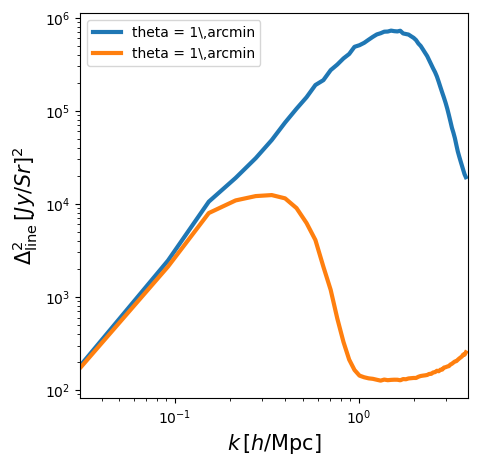

In [62]:
# plot the power spectrum
fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)

KF = 2* np.pi/boxsize
KN = np.pi * ngrid/boxsize

ax.loglog(kcal, lu.dk(kcal, pkcal), lw=3, label = "theta = 1\,arcmin")
ax.loglog(kcal_beam2, lu.dk(kcal_beam2, pkcal_beam2), lw=3, label = "theta = 1\,arcmin")

plt.ylabel(r"$\Delta^2_{\rm line} \, [Jy/Sr]^2$")
plt.xlabel(r"$k\, [h/\mathrm{Mpc}]$")

plt.legend(loc=0)

plt.xlim(KF, KN)